In [1]:
import os
import pandas as pd
import numpy as np

#pip install -U ydata-profiling
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Datenimport
Quelle der Daten: https://data.milwaukee.gov/dataset/property-sales-data

In [2]:
FILEPATH_2020 = os.path.join("..", "input", "armslengthsales_2020_valid.csv")
FILEPATH_2021 = os.path.join("..", "input", "armslengthsales_2021_valid.csv")
FILEPATH_2022 = os.path.join("..", "input", "armslengthsales_2022_valid.csv")

In [3]:
df_2020 = pd.read_csv(FILEPATH_2020)
df_2021 = pd.read_csv(FILEPATH_2021)
df_2022 = pd.read_csv(FILEPATH_2022)

In [4]:
#df = pd.concat([df_2020, df_2021, df_2022])
df = df_2022

## EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Dev\Python\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x000002AF3F974E90, file "c:\Dev\Python\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\ydata_profiling\model\pandas\correlations_pandas.py", line 164>')
  warnings.warn(
c:\Dev\Python\Anaconda3\envs\dbuas-ads-2-ml-and-reporting-full-studienarbeit-dariusmix\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce differ

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

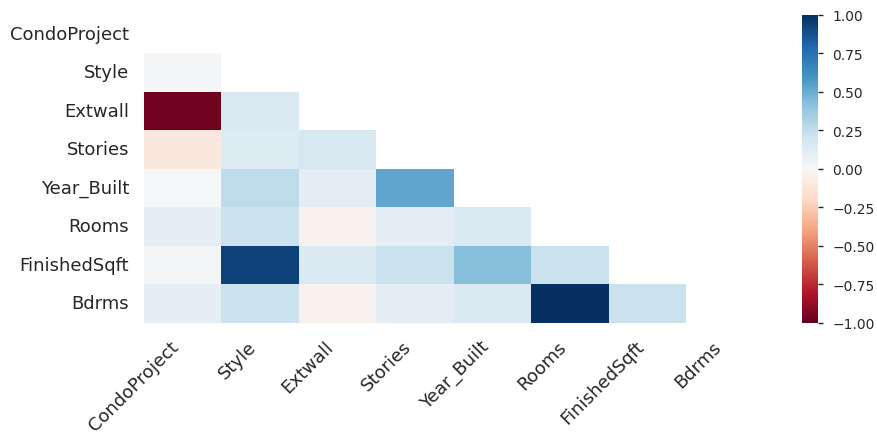

In [6]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file(os.path.join("..", "output", "property-sales-dataset.html"))

### Beschreibung und Analyse des Datensatzes
Der Datensatz beinhaltet Verkaufsdaten über Wohnhäuser, Eigentumswohnungen, Gewerbeimmobilien, Apartments und unbebaute Grundstücke. <br>
<br>
7146 Zeilen<br>
8168 fehlende Werte<br>
20 Variablen

```PropertyID``` - Enthält die eindeutige ID der Immobilie  
```PropType``` - Enthält den Typ der Immobilie - 6 verschiedene mit Anteil in %: 81,4% Residential (Wohnimmobilien), 13% Condominium (Eigentumswohnungen), 3% Large Apartment (Große Wohnungen), 2,6% Commercial (Gewerbeimmobilien), <0,1% Manufacturing (Produktionsstätten), <0,1% Exempt (Andere)  
```taxkey``` - Enthält die eindeutige Steuerliche Kennung der Immobilie  
```Address``` - Enthält die Adresse der Immobilie  
```CondoProject``` - Nur für Condominium (Eigentumswohnungen) relevant - enthält einen Projektnamen  
```District``` - Nummer des Districts (Stadtteil) von Milwaukee  
```nbhd``` - Nummer der "Nachbarschaft" - vermutlich eine detaillierte Einteilung der Districts  
```Style``` - Enthält die "Art" der Immobilie wie Ranch, Townhouse und Medical Clinic  
```Extwall``` - Beschreibt die Außenverkleidung der Immobilie wie Aluminium/Vinyl, Wood (Holz) oder Bricks (Ziegel)  
```Stories```- Enthält die Anzahl der Stockwerke der Immobilie  
```Year_Built``` - Enthält das Baujahr der Immobilie  
```Rooms``` - Enthält die Anzahl der Räume der Immobilie  
```FinishedSqft``` - Beschreibt die Gesamtfläche in Quadrratfuß der Immobilie an 1 Quardratfuß = 0,092903 Quadratmeter  
```Units``` - Enthält die Anzahl an Wohneineinheiten der Immobilie  
```Bdrms``` - Enthält die Anzahl an Schlafzimmern der Immobilie  
```Fbath``` - Enthält die Anzahl an "Vollbädern" (Badezimmer mit Badewanne/Dusche) der Immobilie  
```Hbath``` - Enthält die Anzahl an "Halbbädern" (Badezimmer ohne Badewanne/Dusche) der Immobilie  
```Lotsize``` - Enthält die Größe des Grundstücks, auf dem die Immobilie steht
```Sale_date``` - Enthält das Datum, an dem die Immobilie verkauft wurde
```Sale_prize```

### Fehlende Werte prüfen und entfernen

In [34]:
# Entfernen der irrelevanten Spalten
df.drop('PropertyID', axis=1, inplace=True)
df.drop('taxkey', axis=1, inplace=True)
df.drop('Address', axis=1, inplace=True)
df.drop('CondoProject', axis=1, inplace=True)

In [35]:
df.isnull().sum()

PropType          0
District          0
nbhd              0
Style            21
Extwall         926
Stories          39
Year_Built       11
Rooms           443
FinishedSqft     24
Units             0
Bdrms           443
Fbath             0
Hbath             0
Lotsize           0
Sale_date         0
Sale_price        0
dtype: int64

### Hinzufügen neuer zeitlicher Variablen

In [43]:
# Ersetzen des index durch die Spalte 'Sale_date'
df.set_index('Sale_date', inplace=True)

# Umwandeln des Datums in den Datentyp 'DatetimeIndex' 
df.index = pd.DatetimeIndex(df.index)

# Hinzufügen zeitlicher Variablen (Jahr, Monat, Tag und Kalenderwoche und das Datum erneut als Spalte)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekOfYear'] = df.index.isocalendar().week
df['Sale_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])